# Clusterização Hierarquica

## Teoria

### O que é?

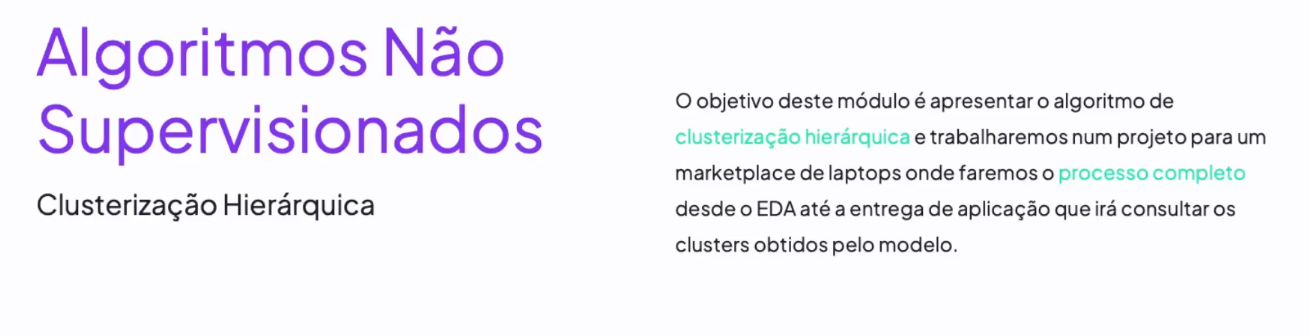

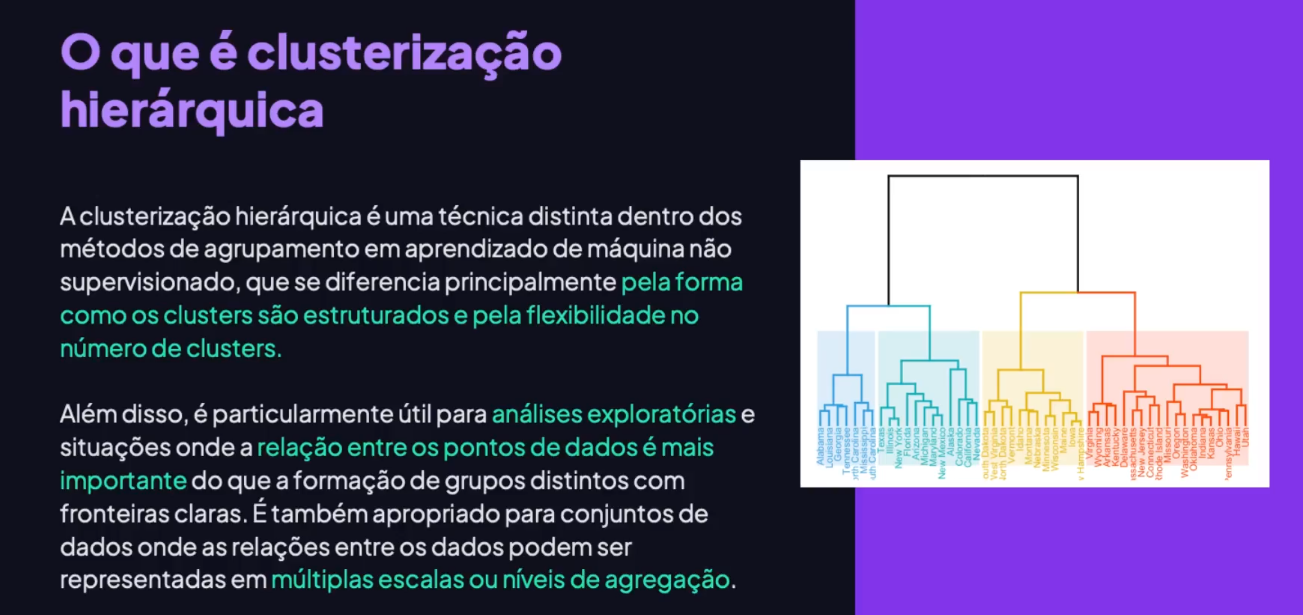

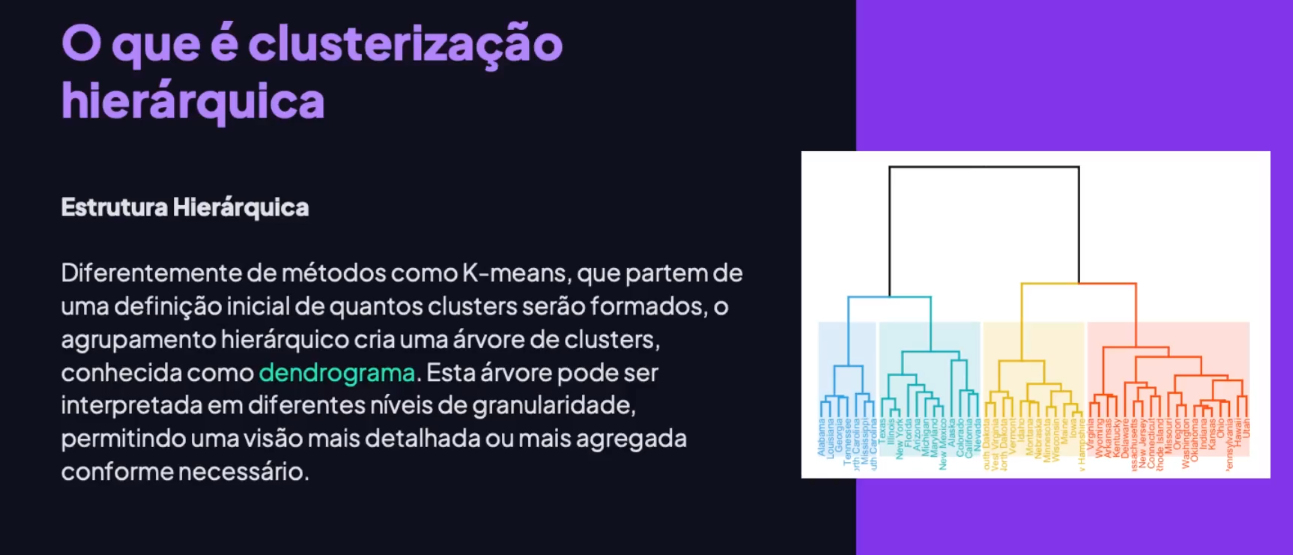

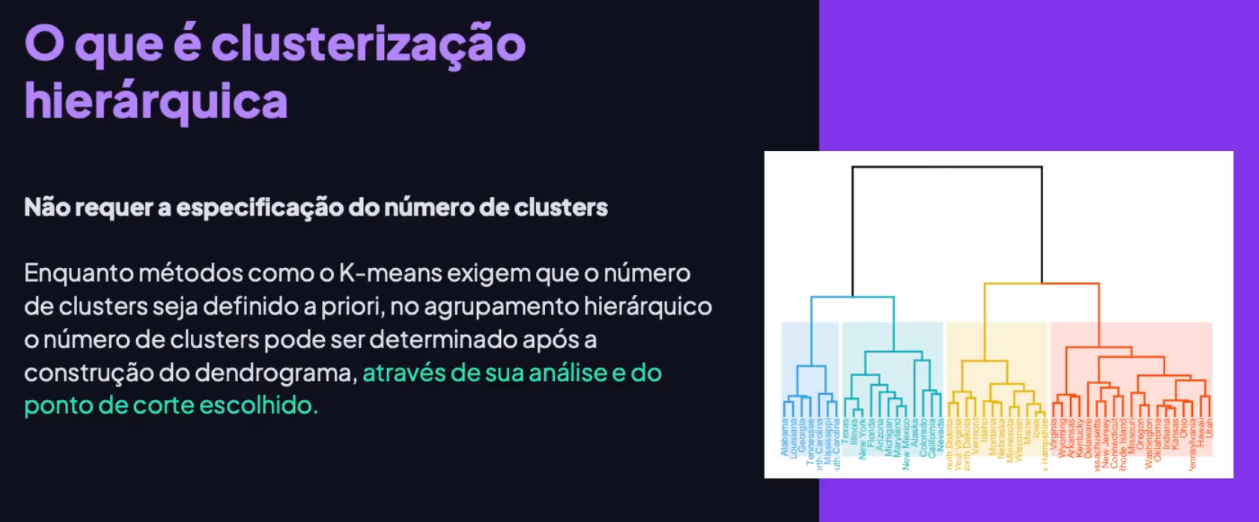

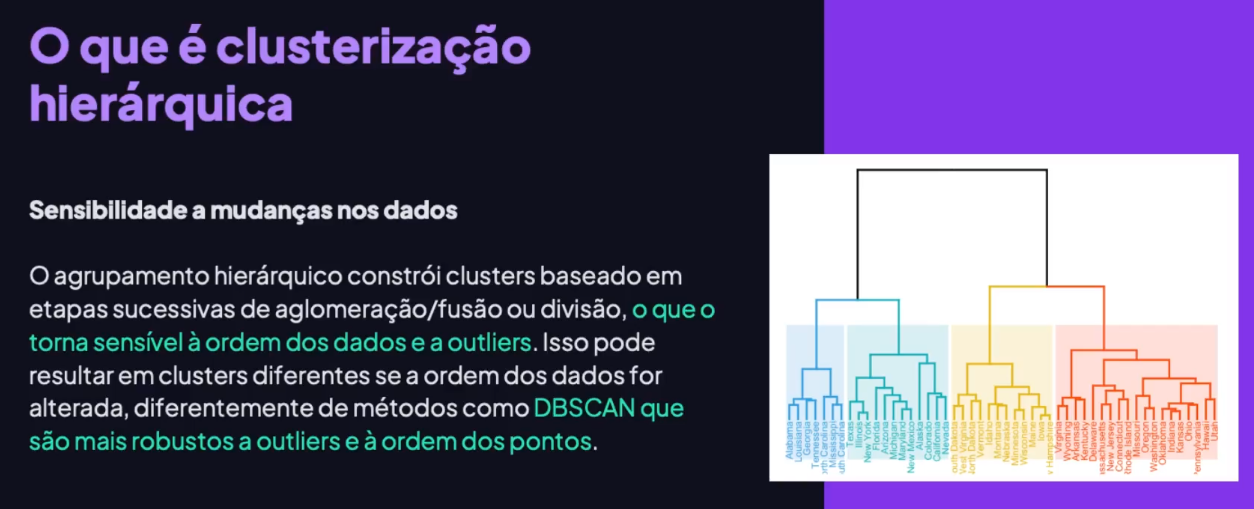

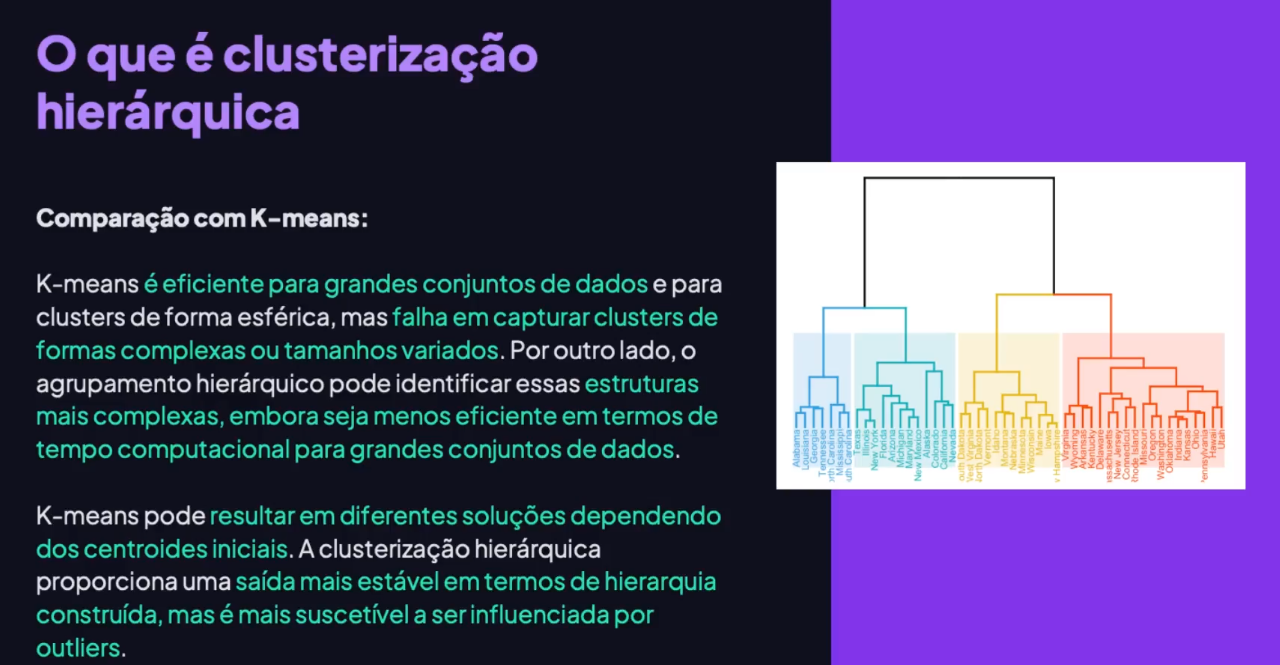

### Etapas

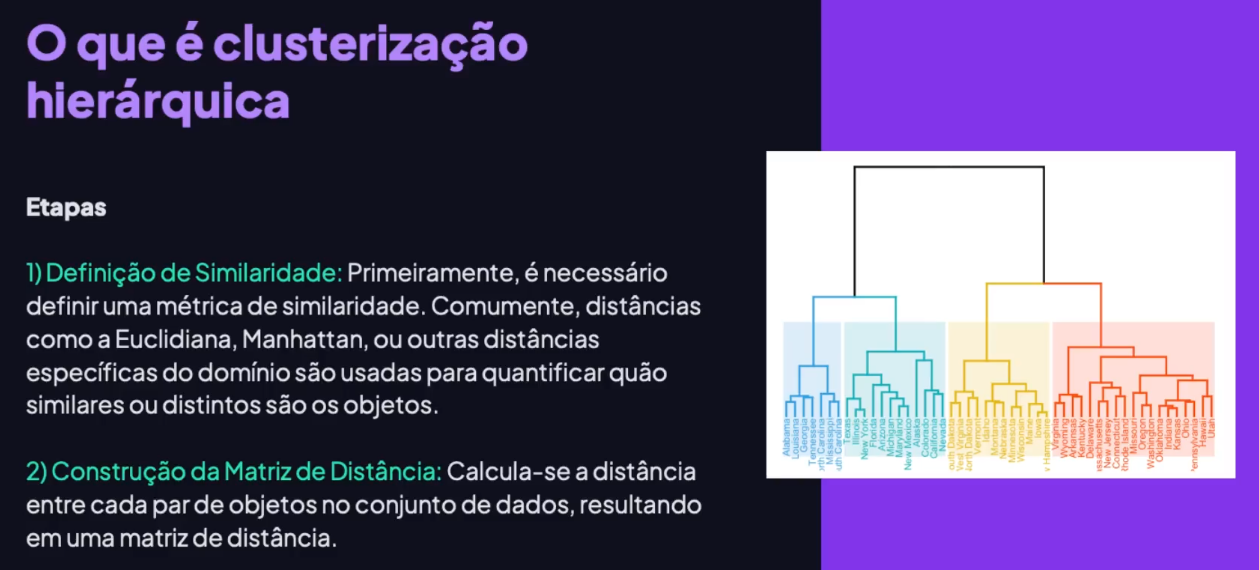

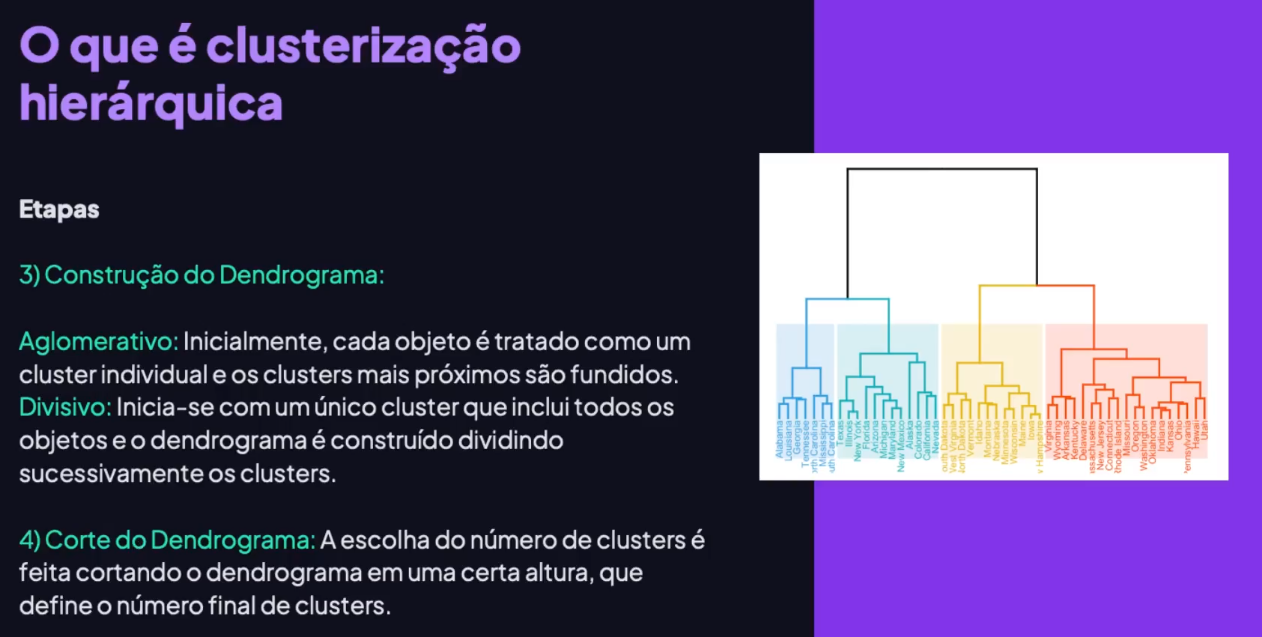

### Algoritmo aglomerativo

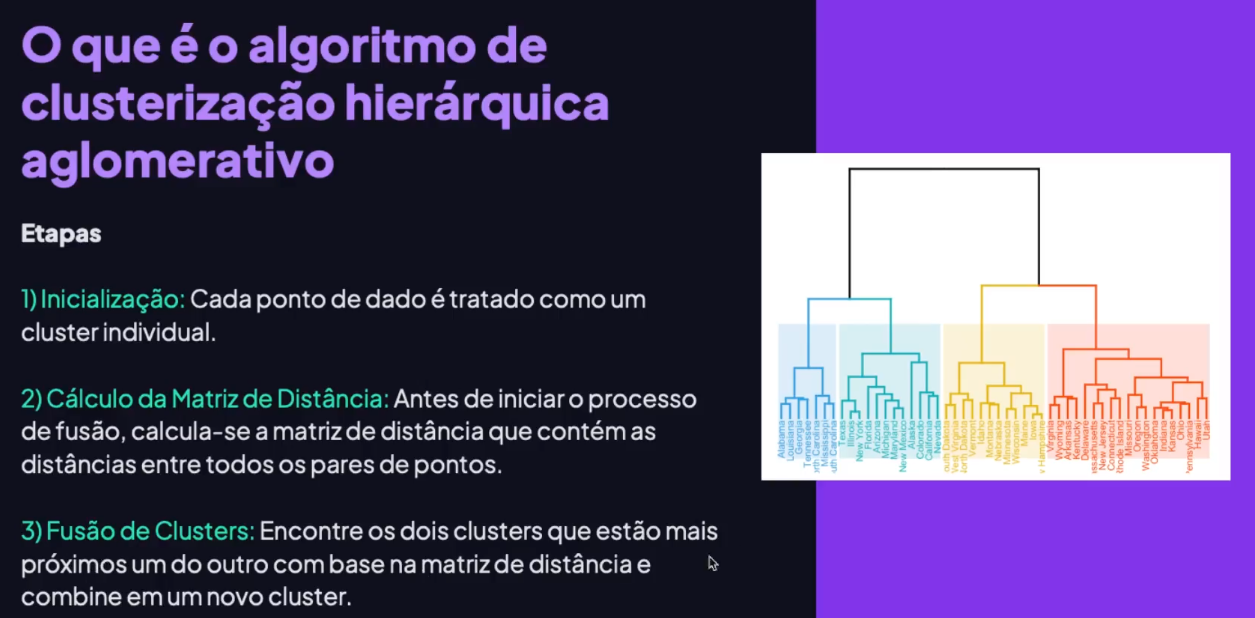

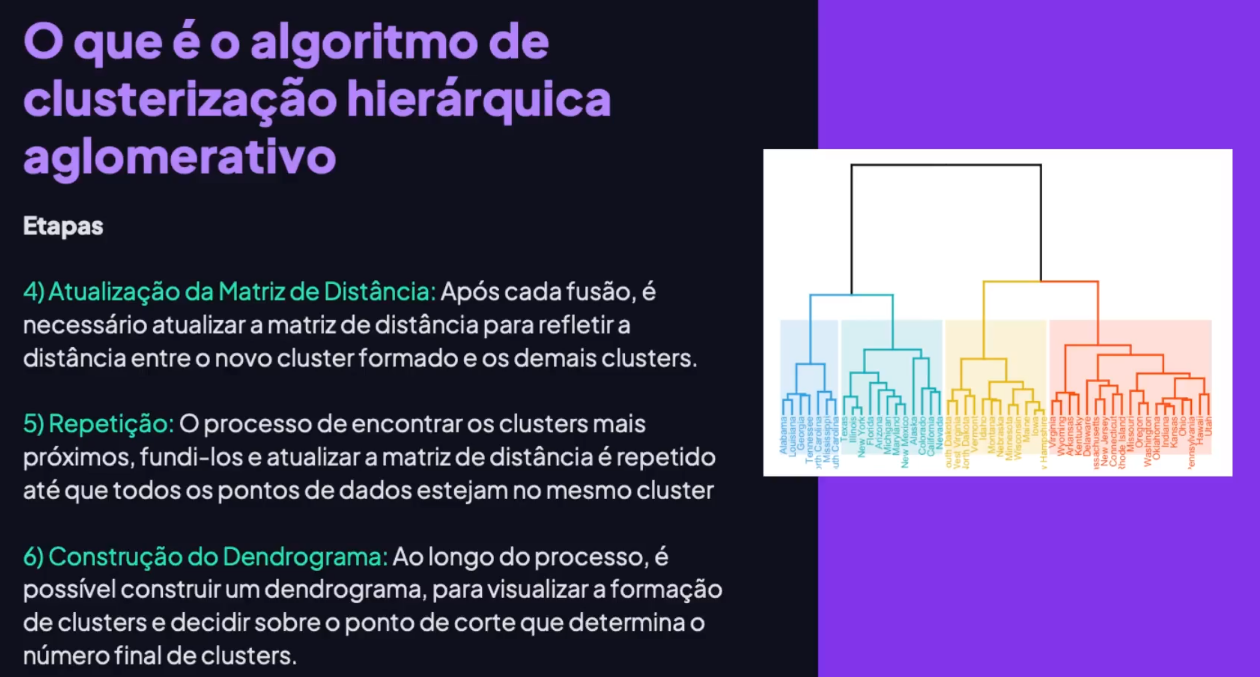

### Algoritmo divisivo

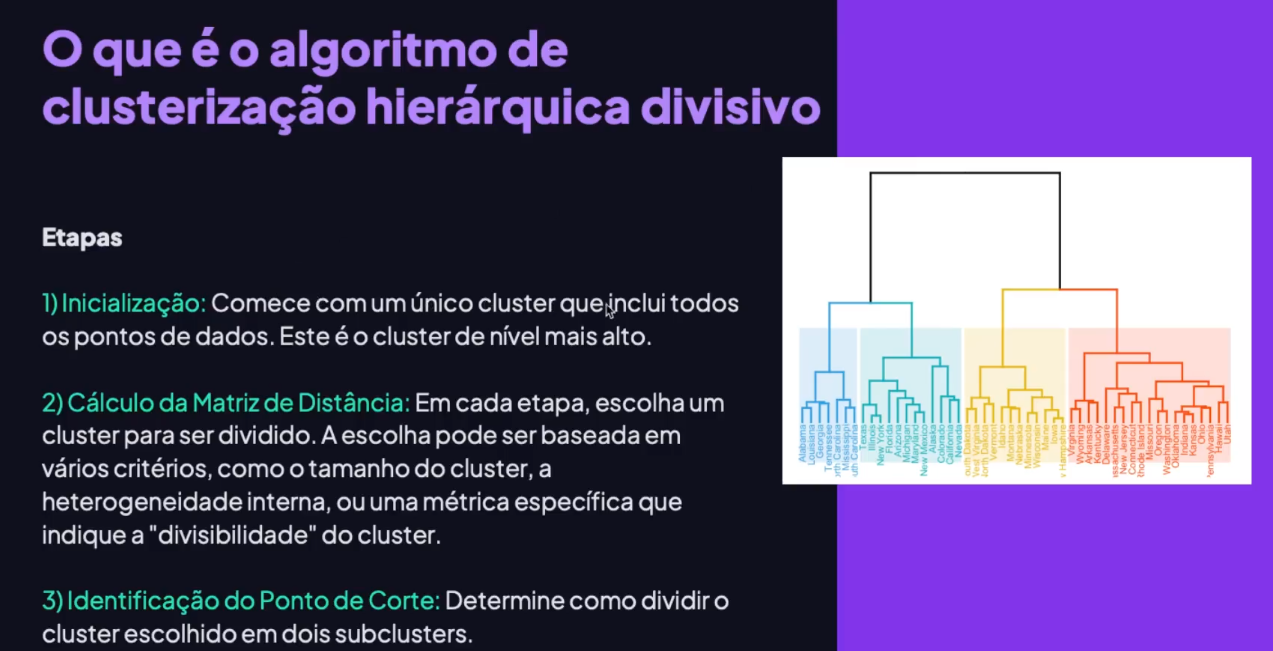

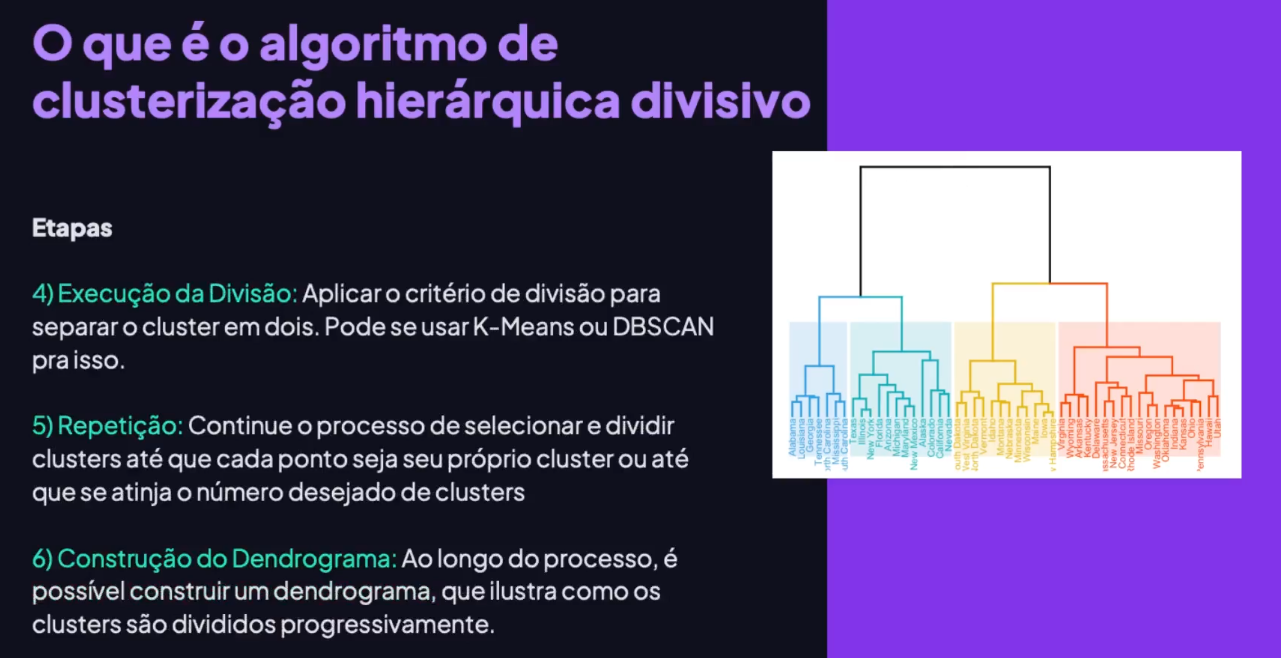

### Dendograma

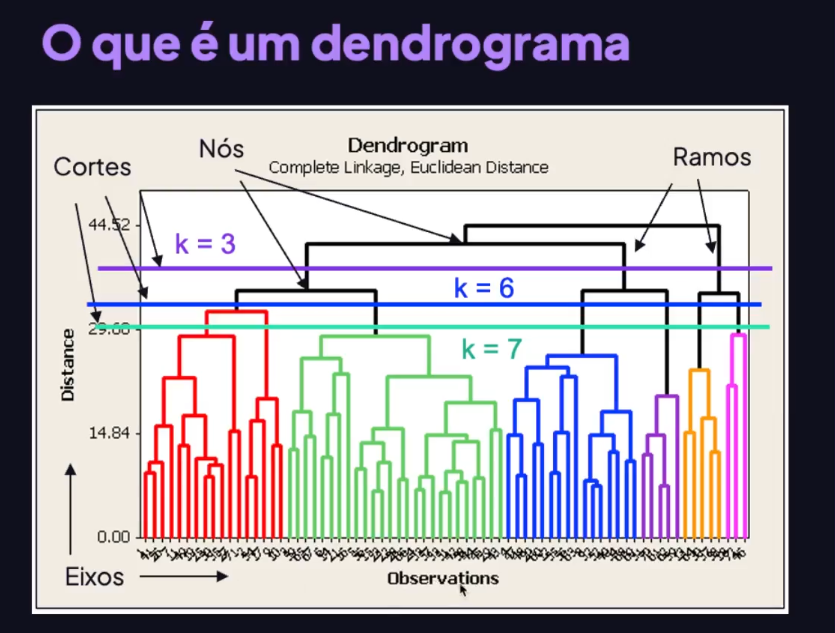

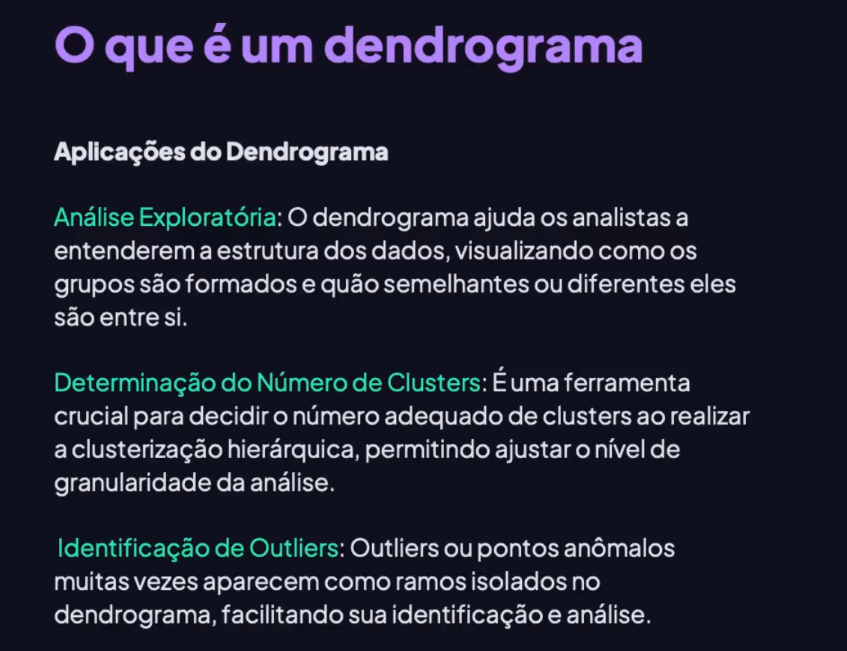

## Projeto

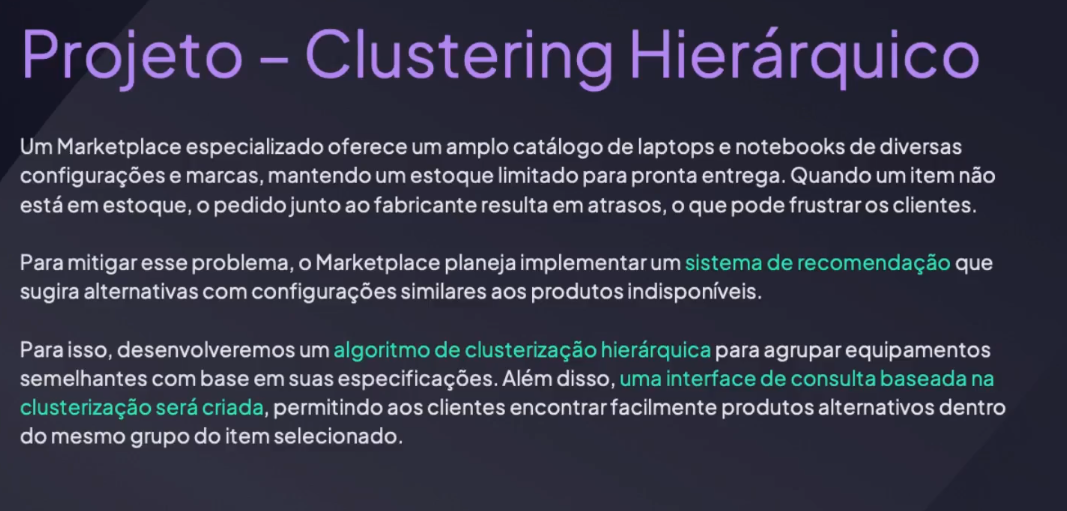

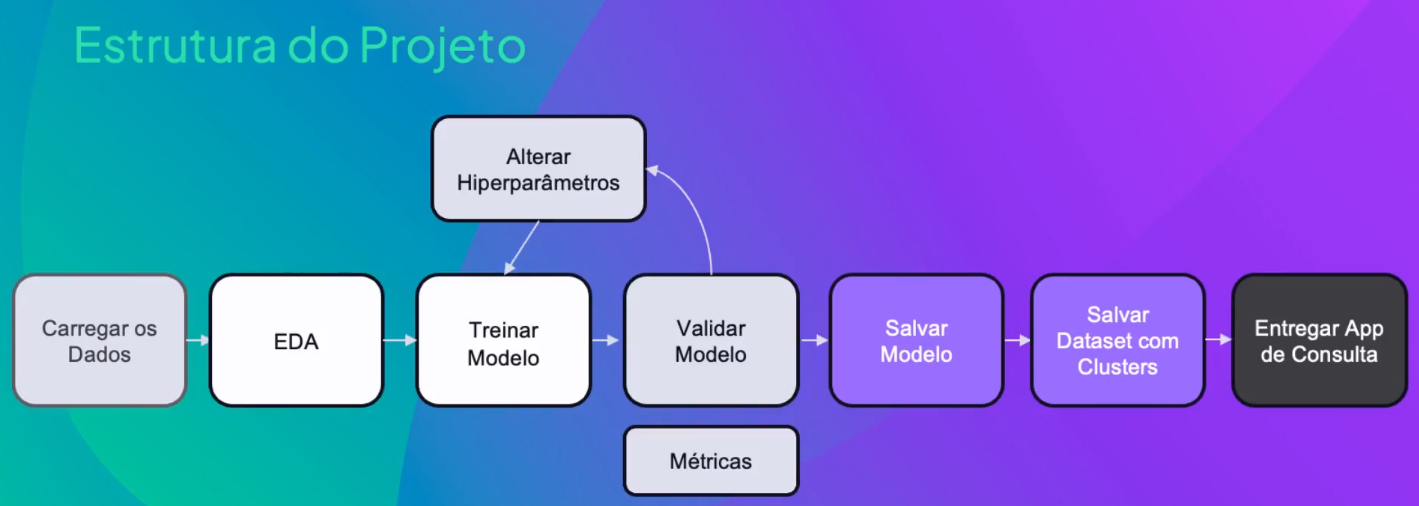

## Importações

`pipenv install pandas seaborn pyplot scikit-learn matplotlib scipy ipywidgets ipykernel optuna streamlit nbformat  -d --python 3.9`

In [1]:
# EDA
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# ML
from sklearn.cluster import AgglomerativeClustering, BisectingKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

# Otimização
import optuna

In [2]:
# Carregar dataframe
df_laptops = pd.read_csv('./dataset/laptops_dataset.csv')

## Visualizar dataframe

In [3]:
# Visualizar estrutura do dataframe
df_laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     991 non-null    int64  
 1   brand                     991 non-null    object 
 2   model                     991 non-null    object 
 3   price                     991 non-null    float64
 4   rating                    991 non-null    int64  
 5   processor_brand           991 non-null    object 
 6   processor_tier            991 non-null    object 
 7   num_cores                 991 non-null    int64  
 8   num_threads               991 non-null    int64  
 9   ram_memory                991 non-null    int64  
 10  primary_storage_type      991 non-null    object 
 11  primary_storage_capacity  991 non-null    int64  
 12  gpu_brand                 991 non-null    object 
 13  gpu_type                  991 non-null    object 
 14  is_touch_s

In [4]:
# Visualizar 10 primeiras linhas do dataframe
df_laptops.head(10)

index    brand                                              model   price  \
0      1    tecno  Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...  287.72   
1      2    tecno  Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...  431.64   
2      3       hp  HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...  612.86   
3      4     acer  Acer Extensa EX214-53 Laptop (12th Gen Core i5...  479.62   
4      5   lenovo  Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...  342.77   
5      6    apple  Apple MacBook Air 2020 MGND3HN Laptop (Apple M...  851.41   
6      7  infinix  Infinix INBook Y2 Plus Laptop (11th Gen Core i...  419.65   
7      8     asus  Asus TUF Gaming F15 FX506HF-HN024W Gaming Lapt...  599.55   
8      9       hp  HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...  443.64   
9     10  infinix  Infinix Zerobook 2023 Laptop (13th Gen Core i9...  719.48   

   rating processor_brand processor_tier  num_cores  num_threads  ram_memory  \
0      63           intel        core i3          2            4           8   
1      67           intel        core i7          4            8          16   
2      73             amd        ryzen 5          6           12           8   
3      62           intel        core i5         12           16           8   
4      62             amd        ryzen 3          4            8           8   
5      45           apple             m1          8            8           8   
6      56           intel        core i5          4            8          16   
7      70           intel        core i5          6           12           8   
8      60           intel        core i3          6            8           8   
9      71           intel        core i9         14           20          32   

  primary_storage_type  primary_storage_capacity gpu_brand    gpu_type  \
0                  SSD                       512     intel  integrated   
1                  SSD                      1024     intel  integrated   
2                  SSD                       512       amd   dedicated   
3                  SSD                       512     intel  integrated   
4                  SSD                       512       amd  integrated   
5                  SSD                       256     apple       apple   
6                  SSD                       512     intel  integrated   
7                  SSD                       512    nvidia   dedicated   
8                  SSD                       512     intel  integrated   
9                  SSD                      1024     intel  integrated   

   is_touch_screen  display_size  resolution_width  resolution_height  \
0            False          15.6              1920               1080   
1            False          15.6              1920               1080   
2            False          15.6              1920               1080   
3            False          14.0              1920               1080   
4            False          15.6              1920               1080   
5            False          13.3              2560               1600   
6            False          15.6              1920               1080   
7            False          15.6              1920               1080   
8            False          15.6              1920               1080   
9            False          15.6              1920               1080   

        os year_of_warranty  
0  windows                1  
1  windows                1  
2  windows                1  
3  windows                1  
4  windows                1  
5      mac                1  
6  windows                1  
7  windows                1  
8  windows                1  
9  windows                1

In [5]:
# Visualizar 10 últimas linhas do dataframe
df_laptops.tail(10)

index brand                                              model    price  \
981    993   msi  MSI Katana 15 B13VFK-296IN Gaming Laptop (13th...  1439.09   
982    994  asus  Asus Zenbook 14 OLED 2023 UM3402YA-KM551WS Lap...   935.36   
983    995  asus  Asus Vivobook 16 2023 M1605YA-MB551WS Laptop (...   803.44   
984    996  asus  Asus Vivobook 16 2023 M1605YA-MB541WS Laptop (...   719.48   
985    997  acer  Acer Nitro 5 AN515-47 NH.QL3SI.003 Gaming Lapt...   905.50   
986    998  asus  Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...   791.44   
987    999   msi  MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...  1103.27   
988   1000  asus  Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...   539.58   
989   1001  asus  Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...   815.43   
990   1002    hp  HP Chromebook 15a-na0008TU Laptop (Intel Celer...   251.74   

     rating processor_brand processor_tier  num_cores  num_threads  \
981      76           intel        core i7         10           16   
982      68             amd        ryzen 5          6           12   
983      65             amd        ryzen 5          6           12   
984      64             amd        ryzen 5          6           12   
985      67             amd        ryzen 7          8           16   
986      68             amd        ryzen 5          6           12   
987      73           intel        core i7         10           16   
988      59             amd        ryzen 5          4            8   
989      68             amd        ryzen 5          6           12   
990      37           intel        celeron          2            2   

     ram_memory primary_storage_type  primary_storage_capacity gpu_brand  \
981          16                  SSD                      1024    nvidia   
982          16                  SSD                      1024       amd   
983          16                  SSD                      1024       amd   
984          16                  SSD                       512       amd   
985           8                  SSD                       512    nvidia   
986          16                  SSD                       512    nvidia   
987          16                  SSD                       512    nvidia   
988           8                  SSD                       512       amd   
989          16                  SSD                       512       amd   
990           4                  HDD                       128     intel   

       gpu_type  is_touch_screen  display_size  resolution_width  \
981   dedicated            False          15.6              1920   
982  integrated            False          14.0              2880   
983  integrated            False          16.0              1920   
984  integrated            False          16.0              1920   
985   dedicated            False          15.6              1920   
986   dedicated            False          15.6              1920   
987   dedicated            False          15.6              1920   
988  integrated            False          15.6              1920   
989  integrated            False          14.0              2560   
990  integrated            False          15.6              1366   

     resolution_height       os year_of_warranty  
981               1080  windows                2  
982               1800  windows                1  
983               1200  windows                1  
984               1200  windows                1  
985               1080  windows                1  
986               1080  windows                1  
987               1080  windows                2  
988               1080  windows                1  
989               1600  windows                1  
990                768   chrome                1

## EDA

In [6]:
# Estatisticas das variaveis
df_laptops.describe()

index        price      rating   num_cores  num_threads  \
count   991.000000   991.000000  991.000000  991.000000   991.000000   
mean    505.860747   926.687487   63.931382    8.128153    12.191726   
std     287.899458   688.239764   10.190575    4.215499     5.585115   
min       1.000000   117.540000   24.000000    2.000000     0.000000   
25%     258.500000   522.850000   58.000000    6.000000     8.000000   
50%     507.000000   742.390000   64.000000    8.000000    12.000000   
75%     754.500000  1070.350000   71.000000   10.000000    16.000000   
max    1002.000000  5450.880000   89.000000   24.000000    32.000000   

       ram_memory  primary_storage_capacity  display_size  resolution_width  \
count  991.000000                991.000000    991.000000        991.000000   
mean    13.047427                610.938446     15.171241       2003.503532   
std      5.591188                266.927666      0.938089        361.965292   
min      2.000000                 32.000000     10.100000       1080.000000   
25%      8.000000                512.000000     14.000000       1920.000000   
50%     16.000000                512.000000     15.600000       1920.000000   
75%     16.000000                512.000000     15.600000       1920.000000   
max     36.000000               2048.000000     18.000000       3840.000000   

       resolution_height  
count         991.000000  
mean         1181.227043  
std           263.884019  
min           768.000000  
25%          1080.000000  
50%          1080.000000  
75%          1200.000000  
max          2560.000000

### Limpeza das variáveis

In [7]:
# Checar variável year_of_warranty
df_laptops['year_of_warranty'].unique()

array(['1', '2', 'No information', '3'], dtype=object)

In [8]:
# Ajustar variável year_of_warranty
df_laptops.loc[df_laptops['year_of_warranty'] == 'No information', 'year_of_warranty'] = 1
df_laptops['year_of_warranty'] = df_laptops['year_of_warranty'].astype(int)

In [9]:
# Transformar variável booleana em int (is_touch_screen)
df_laptops['is_touch_screen'] = df_laptops['is_touch_screen'].astype(int)

### Distribuição das variaveis (Análise univariada)

In [12]:
# Distribuição da variável brand
brand_percentage = df_laptops.value_counts('brand', normalize=True) * 100
px.bar(brand_percentage, color=brand_percentage.index, title='Distribuição da variável brand')

In [13]:
# Distribuição da variável processor_brand
processor_brand_percentage = df_laptops.value_counts('processor_brand', normalize=True) * 100
px.bar(processor_brand_percentage, color=processor_brand_percentage.index, title='Distribuição da variável processor_brand')

<Axes: xlabel='price', ylabel='Count'>

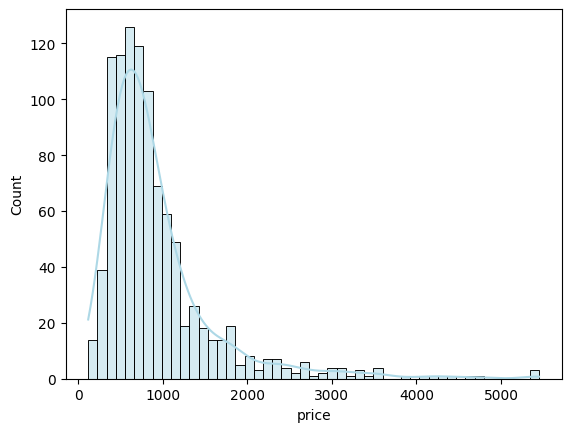

In [14]:
# Distribuição da variável price
sns.histplot(df_laptops['price'], kde=True, color='lightblue')

<Axes: xlabel='rating', ylabel='Count'>

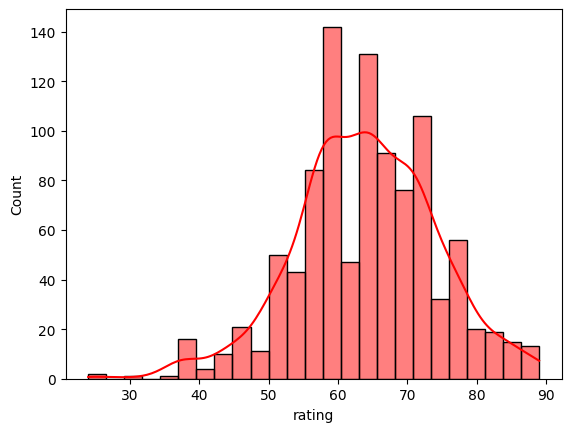

In [16]:
# Distribuição da variável rating
sns.histplot(df_laptops['rating'], kde=True, color='red')

### Cruzar dados (Análise bivariada)

In [17]:
# Plot de distribuição por brand e price
px.box(df_laptops, x='price', y='brand', color='brand', orientation='h', title='Distribuição de price por brand')

In [18]:
# Plot de distribuição por brand e rating
px.box(df_laptops, x='rating', y='brand', color='brand', orientation='h', title='Distribuição de rating por brand')

In [19]:
# Plot de distribuição por rating e price
px.scatter(df_laptops, x='price', y='rating', color='brand', title='Distribuição de price por rating')

## Treinamento do modelo

### Preparar variaveis

In [20]:
# Selecionar as colunas para clusterização
X = df_laptops.copy()

# Remover colunas desnecessárias para não ter a maldição de dimensionalidade (mais colunas do que linhas)
X.drop(columns=['model', 'index'], axis=1, inplace=True)

In [23]:
X.head()

brand   price  rating processor_brand processor_tier  num_cores  \
0   tecno  287.72      63           intel        core i3          2   
1   tecno  431.64      67           intel        core i7          4   
2      hp  612.86      73             amd        ryzen 5          6   
3    acer  479.62      62           intel        core i5         12   
4  lenovo  342.77      62             amd        ryzen 3          4   

   num_threads  ram_memory primary_storage_type  primary_storage_capacity  \
0            4           8                  SSD                       512   
1            8          16                  SSD                      1024   
2           12           8                  SSD                       512   
3           16           8                  SSD                       512   
4            8           8                  SSD                       512   

  gpu_brand    gpu_type  is_touch_screen  display_size  resolution_width  \
0     intel  integrated                0          15.6              1920   
1     intel  integrated                0          15.6              1920   
2       amd   dedicated                0          15.6              1920   
3     intel  integrated                0          14.0              1920   
4       amd  integrated                0          15.6              1920   

   resolution_height       os  year_of_warranty  
0               1080  windows                 1  
1               1080  windows                 1  
2               1080  windows                 1  
3               1080  windows                 1  
4               1080  windows                 1

In [24]:
# Separando as features numéricas e categóricas
numeric_features = ['price', 'rating', 'num_cores', 'num_threads', 'ram_memory', 'primary_storage_capacity', 'display_size', 'resolution_width', 'resolution_height']
categorical_features = ['brand', 'processor_brand', 'gpu_brand', 'gpu_type', 'os']

In [25]:
# Definir as transformações
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [26]:
# Criar preprocessador de colunas
preprocessor = ColumnTransformer(
  transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
	]
)

In [28]:
# Transformar os dados
X_transformed = preprocessor.fit_transform(X)

In [32]:
# Visualizar os dados transformados
X_transformed

<991x54 sparse matrix of type '<class 'numpy.float64'>'
	with 13874 stored elements in Compressed Sparse Row format>

### Otimização - Aglomerativo

In [33]:
# Criar função com o objetivo de maximizar o silhouette score
def hierarchical_aglomerative_objective(trial):
		# Definir os hiperparâmetros a serem otimizados
		n_clusters = trial.suggest_int('n_clusters', 10, 150)
		
		# Linkage = método de ligação entre os clusters
		# Ward = variância mínima
		# Complete = variância máxima
		# Average = média das variâncias
		# Single = menor distância entre os clusters
		linkage_method = trial.suggest_categorical('linkage', ['ward', 'complete', 'average', 'single'])
		
		# Instanciar o modelo
		hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)

		# Treinar o modelo e executar a clusterização
		y = hierarchical_model.fit_predict(X_transformed.toarray())

		# Calcular o silhouette score
		silhouette_avg = silhouette_score(X_transformed, y)
		
		return silhouette_avg

In [34]:
# Criação do estudo de otimização
search_space_ag = {
	'n_clusters': range(10, 151),
	'linkage': ['ward', 'complete', 'average', 'single']
}
sampler_ag = optuna.samplers.GridSampler(search_space=search_space_ag)
study_ag = optuna.create_study(direction='maximize', sampler=sampler_ag)

[I 2024-11-09 15:59:56,545] A new study created in memory with name: no-name-349be31b-c992-4e19-bf8b-984f001935a6


In [36]:
# Executar o estudo do optuna para a clusterização hierárquica aglomerativa
study_ag.optimize(hierarchical_aglomerative_objective, n_trials=600)

[I 2024-11-09 16:00:17,211] Trial 100 finished with value: 0.23971536429833912 and parameters: {'n_clusters': 134, 'linkage': 'average'}. Best is trial 57 with value: 0.32729777740951294.
[I 2024-11-09 16:00:17,260] Trial 101 finished with value: 0.21694284352360363 and parameters: {'n_clusters': 109, 'linkage': 'complete'}. Best is trial 57 with value: 0.32729777740951294.
[I 2024-11-09 16:00:17,306] Trial 102 finished with value: 0.21982110245597525 and parameters: {'n_clusters': 100, 'linkage': 'average'}. Best is trial 57 with value: 0.32729777740951294.
[I 2024-11-09 16:00:17,353] Trial 103 finished with value: -0.049381453674799805 and parameters: {'n_clusters': 90, 'linkage': 'single'}. Best is trial 57 with value: 0.32729777740951294.
[I 2024-11-09 16:00:17,399] Trial 104 finished with value: 0.16758133639394757 and parameters: {'n_clusters': 11, 'linkage': 'complete'}. Best is trial 57 with value: 0.32729777740951294.
[I 2024-11-09 16:00:17,444] Trial 105 finished with value: 

In [ ]:
# Mostrar o melhor resultado do estudo do optuna - Aglomerativo
best_params_ag = study_ag.best_params

print(f"Clusters : {best_params_ag['n_clusters']}")
print(f"Linkage : {best_params_ag['linkage']}")

Clusters : 149
Linkage : ward


### Otimização - Divisivo

In [39]:
# Criar função com o objetivo de maximizar o silhouette score
def hierarchical_divisive_objective(trial):
		# Definir os hiperparâmetros a serem otimizados
		n_clusters = trial.suggest_int('n_clusters', 10, 150)
		
		# Instanciar o modelo
		hierarchical_model = BisectingKMeans(n_clusters=n_clusters)

		# Treinar o modelo e executar a clusterização
		y = hierarchical_model.fit_predict(X_transformed.toarray())

		# Calcular o silhouette score
		silhouette_avg = silhouette_score(X_transformed, y)
		
		return silhouette_avg

In [40]:
# Criação do estudo de otimização
search_space_div = {
	'n_clusters': range(10, 151),
}
sampler_div = optuna.samplers.GridSampler(search_space=search_space_div)
study_div = optuna.create_study(direction='maximize', sampler=sampler_div)

[I 2024-11-09 16:07:01,964] A new study created in memory with name: no-name-31fa1dc3-180d-4b3d-9e26-050f69a05b1f


In [41]:
# Executar o estudo do optuna para a clusterização hierárquica aglomerativa
study_div.optimize(hierarchical_divisive_objective, n_trials=200)

[I 2024-11-09 16:07:04,244] Trial 0 finished with value: 0.16016833679366918 and parameters: {'n_clusters': 55}. Best is trial 0 with value: 0.16016833679366918.
[I 2024-11-09 16:07:04,326] Trial 1 finished with value: 0.14634798294015933 and parameters: {'n_clusters': 70}. Best is trial 0 with value: 0.16016833679366918.
[I 2024-11-09 16:07:04,354] Trial 2 finished with value: 0.13512029003629375 and parameters: {'n_clusters': 17}. Best is trial 0 with value: 0.16016833679366918.
[I 2024-11-09 16:07:04,403] Trial 3 finished with value: 0.14842532954672089 and parameters: {'n_clusters': 61}. Best is trial 0 with value: 0.16016833679366918.
[I 2024-11-09 16:07:04,450] Trial 4 finished with value: 0.15190758792169573 and parameters: {'n_clusters': 76}. Best is trial 0 with value: 0.16016833679366918.
[I 2024-11-09 16:07:04,484] Trial 5 finished with value: 0.14333634221629457 and parameters: {'n_clusters': 37}. Best is trial 0 with value: 0.16016833679366918.
[I 2024-11-09 16:07:04,535] 

In [ ]:
# Mostrar o melhor resultado do estudo do optuna - Divisivo
best_params_div = study_div.best_params

print(f"Clusters : {best_params_div['n_clusters']}")

Clusters : 147


### Criar melhor modelo

In [43]:
# Instanciar o melhor modelo obtido - Aglomerativo
best_model = AgglomerativeClustering(
  n_clusters=best_params_ag['n_clusters'],
  linkage=best_params_ag['linkage'],
)

In [44]:
# Treinar o modelo e executar a clusterização
best_model.fit(X_transformed.toarray())

AgglomerativeClustering(n_clusters=149)

In [46]:
# Verificar o silhouette score
best_silhouette = silhouette_score(X_transformed, best_model.labels_)
best_silhouette

np.float64(0.3274548072143168)

In [47]:
# Criar coluna com o cluster atribuído a cada laptop
df_laptops['cluster'] = best_model.labels_

In [48]:
df_laptops.head(5)

index   brand                                              model   price  \
0      1   tecno  Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...  287.72   
1      2   tecno  Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...  431.64   
2      3      hp  HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...  612.86   
3      4    acer  Acer Extensa EX214-53 Laptop (12th Gen Core i5...  479.62   
4      5  lenovo  Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...  342.77   

   rating processor_brand processor_tier  num_cores  num_threads  ram_memory  \
0      63           intel        core i3          2            4           8   
1      67           intel        core i7          4            8          16   
2      73             amd        ryzen 5          6           12           8   
3      62           intel        core i5         12           16           8   
4      62             amd        ryzen 3          4            8           8   

   ... primary_storage_capacity  gpu_brand    gpu_type is_touch_screen  \
0  ...                      512      intel  integrated               0   
1  ...                     1024      intel  integrated               0   
2  ...                      512        amd   dedicated               0   
3  ...                      512      intel  integrated               0   
4  ...                      512        amd  integrated               0   

   display_size  resolution_width  resolution_height       os  \
0          15.6              1920               1080  windows   
1          15.6              1920               1080  windows   
2          15.6              1920               1080  windows   
3          14.0              1920               1080  windows   
4          15.6              1920               1080  windows   

  year_of_warranty  cluster  
0                1       73  
1                1       44  
2                1       28  
3                1       53  
4                1       14  

[5 rows x 21 columns]

## Análise dos resultados

### Gráficos e Dendrograma

In [49]:
# Mostrar chart com Trials do optuna - Aglomerativo
fig = optuna.visualization.plot_optimization_history(study_ag)
fig.show()

In [51]:
# Treinar o modelo com scipy
modelo_de = linkage(X_transformed.toarray(), method=best_params_ag['linkage'], optimal_ordering=True)

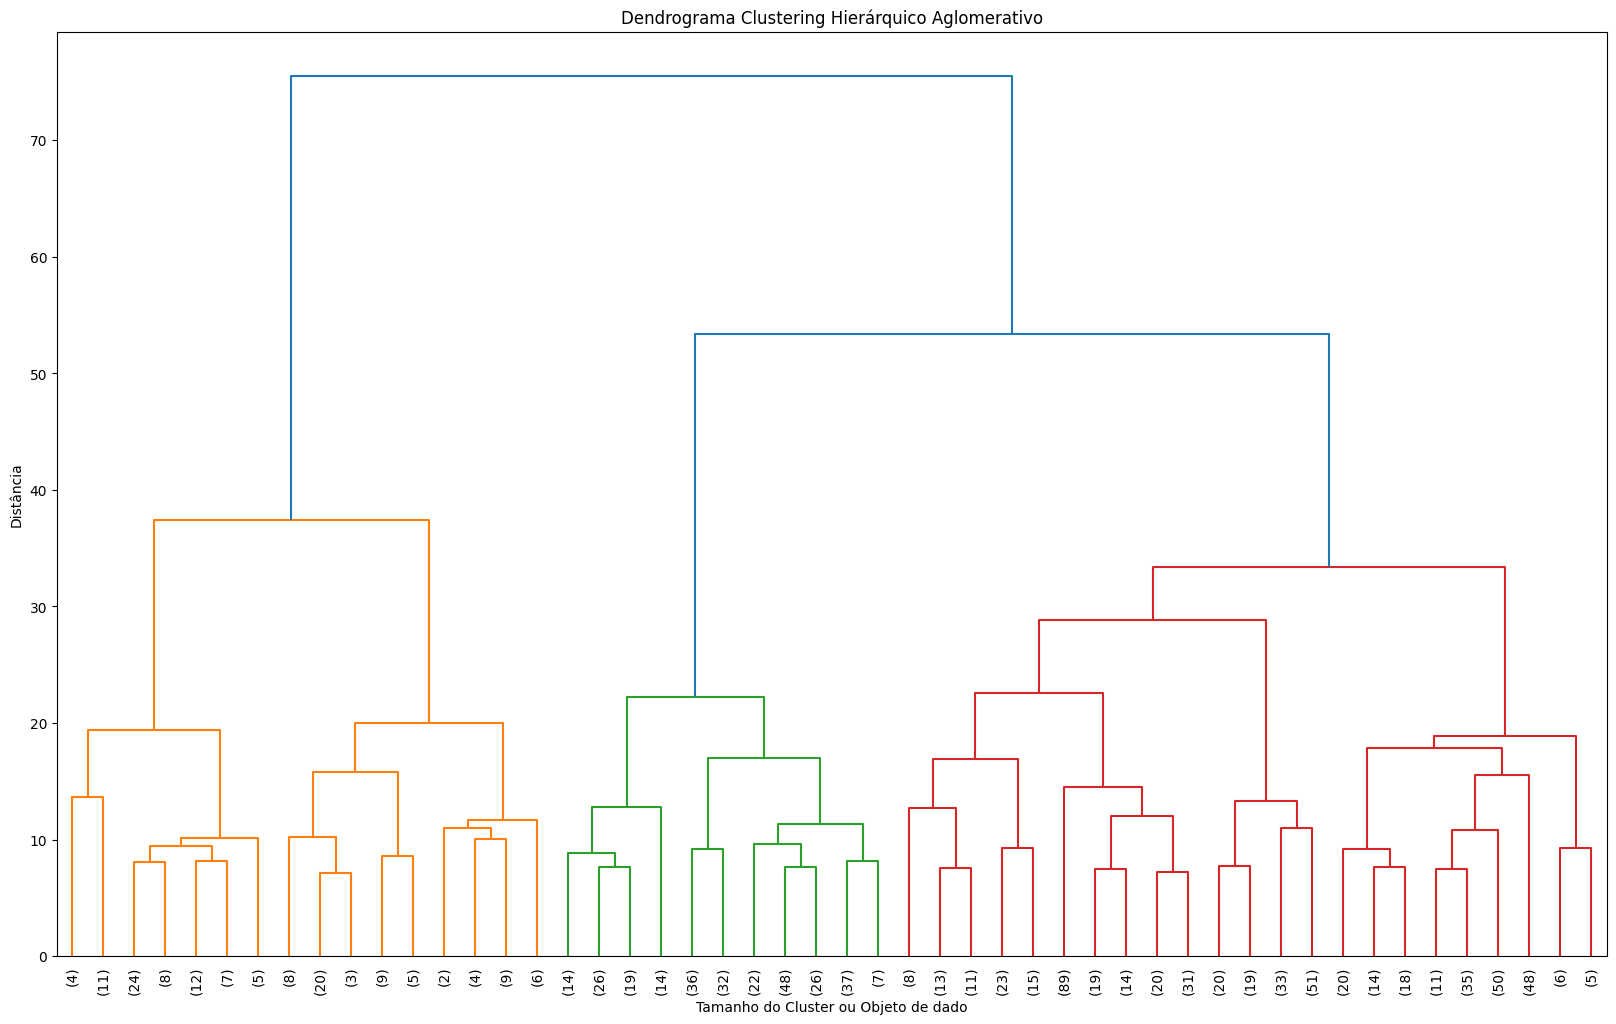

In [57]:
# Mostrar o dendrograma
plt.figure(figsize=(20, 12))
dendrogram(modelo_de, truncate_mode='lastp', p=50, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrograma Clustering Hierárquico Aglomerativo')
plt.xlabel('Tamanho do Cluster ou Objeto de dado')
plt.ylabel('Distância')
plt.show()

In [59]:
# Cortar o dendrograma para obter os clusters
clusters_de_scipy = cut_tree(modelo_de, height=5)
len(np.unique(clusters_de_scipy))

83

### Análise dos clusters

In [64]:
# Cruzamento entre brand e price, apresentando os clusters
px.scatter(df_laptops, x='brand', y='price', color='cluster', title='Distribuição de price por brand')

In [ ]:
# Cruzamento entre cluster e price, apresentando os clusters
px.scatter(df_laptops, x='cluster', y='price', color='brand', title='Distribuição de price por brand')

In [63]:
# Cruzamento entre brand e rating, apresentando os clusters
px.scatter(df_laptops, x='brand', y='rating', color='cluster', title='Distribuição de price por brand')

In [66]:
# Cruzamento entre cluster e rating, apresentando os clusters
px.scatter(df_laptops, x='cluster', y='rating', color='brand', title='Distribuição de price por brand')

In [67]:
# Distribuição de maquinas por cluster
percentage_cluster = df_laptops['cluster'].value_counts(normalize=True) * 100
px.bar(percentage_cluster, color=percentage_cluster.index, title='Distribuição de maquinas por cluster')

In [68]:
# Distribuição de maquinas por cluster
quantity_cluster = df_laptops['cluster'].value_counts()
px.bar(quantity_cluster, color=quantity_cluster.index, title='Distribuição de maquinas por cluster')

## Salvar modelo, pipeline e csv

In [69]:
import joblib

# Salvar o modelo
joblib.dump(best_model, './modelo_clusterizacao_laptops.pkl')

# Salvar o preprocessor
joblib.dump(preprocessor, 'preprocessor_clusterizacao_laptops.pkl')

['preprocessor_clusterizacao_laptops.pkl']

In [70]:
# Salvar CSV atualizado com os clusters
df_laptops.to_csv('./dataset/clusterizacao_laptops.csv', index=False)